#Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Mounting the Drive
**To read the file (Dataset)**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/Datasets/creditcard.csv' #dataset file path

#**Data Preprocessing**



##Data Collection

In [7]:
df = pd.read_csv(path)

In [8]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Duplicate Record

In [9]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 1081


**Duplicate Records Founds. Lets Drop Them**

In [10]:
df.drop_duplicates(inplace=True)

**No Duplicate Record Now**

In [11]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 0


In [12]:
df.reset_index(drop=True, inplace=True)

**Total Instances:** 283726 <br>
**with zero duplicate record.**<br>
**30 Features + Target Variable: "Class"**

##**Features Overview**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

**All features are numerical.**

**Basic Statistics**

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


##**Lets check the distribution of different features and the target variable (Class).**

In [18]:
feat = df.columns
feat = feat.drop(['Time','Amount','Class'])
feat

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

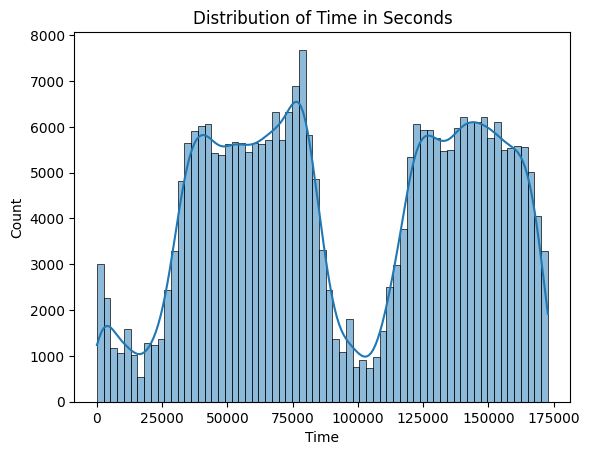

In [19]:
sns.histplot(x='Time', data=df, kde=True)
plt.title('Distribution of Time in Seconds')
plt.show()

**📊 Looking at the graph above, we can see that the "Time" feature has two high points, like two humps. This means that most of the transactions happen at a few specific times of day, but there are a few transactions that happen at very different times. This is not uncommon for credit card fraud data, as fraudsters often try to make transactions at times when they are less likely to be detected.**

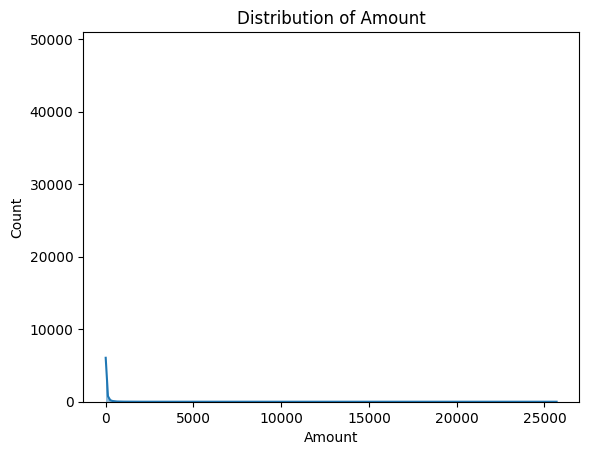

In [20]:
sns.histplot(x='Amount', data=df, kde=True)
plt.title('Distribution of Amount')
plt.show()

**The distribution of the amount feature in the image above is highly skewed to the right, with a long tail. This means that most of the transactions have relatively small amounts, but there are a few transactions with very large amounts. This is a common distribution for fraud data, as fraudsters often try to steal large amounts of money in a single transaction.**

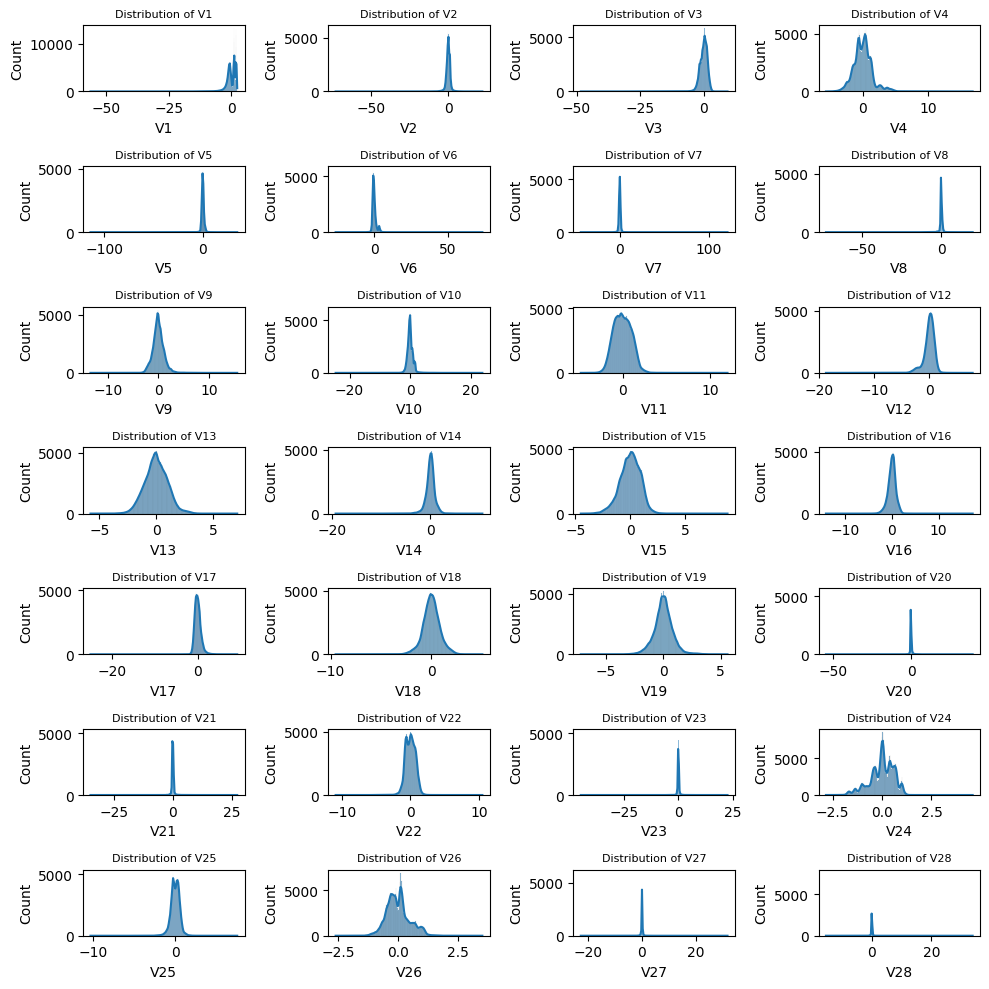

In [21]:
rows = 7
col = 4

fig, ax = plt.subplots(nrows=rows, ncols=col, figsize=(10,10))

for i in range(rows):
  for j in range(col):
    sns.histplot(x=feat[i*col+j], data=df, kde=True, ax=ax[i,j])
    ax[i,j].set_title(f'Distribution of {feat[i*col+j]}', fontsize=8)
plt.tight_layout()
plt.show()



* Most of the features have normal distribution.
* Some features, such as V11, V13, and V15, have a wider distribution than others. This suggests that these features may be more informative for identifying fraudulent transactions.
* A few of the features have a more skewed distribution.
* One feature, V28, has a very different distribution from the other features. It is possible that this feature is not very informative for identifying fraudulent transactions, or that it is an outlier itself, or the other way round





**Features Names**

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Unique Value Counts**

In [23]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

**Target Counts**

In [24]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

**Target Counts Percentage**

In [25]:
target_counts = df['Class'].value_counts()
target_dic = {0:'Non-Fraudulent', 1:'Fraudulent'}
for index, value in zip(target_counts.index, target_counts.values):
  print(f'Class-{target_dic[index]}: {(value/df.shape[0])*100: .2f} %')

Class-Non-Fraudulent:  99.83 %
Class-Fraudulent:  0.17 %


**Ooooh man, this is a highly imbalanced dataset**

The percentage for each label is highly skewed, with:

- **Class-Non-Fraudulent:**  99.83 %
- **Class-Fraudulent:**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.17 %

This suggests that the dataset has an imbalance problem, which will definitely affect the model's performance. To address this issue, it might be essential to employ strategies like oversampling, undersampling, or applying class weights.


**Count Plot**

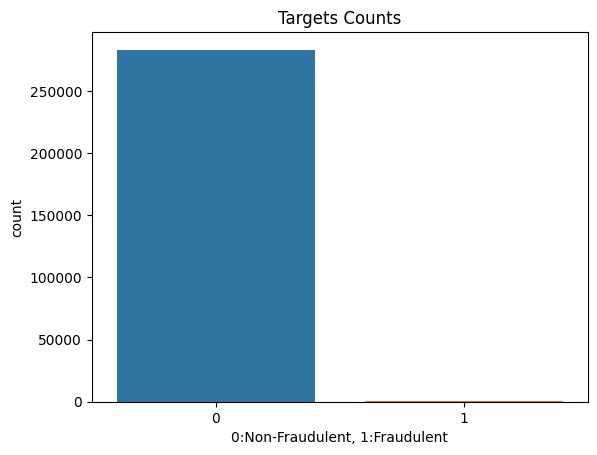

In [35]:
sns.countplot(x='Class', data = df)
plt.title('Targets Counts')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.show()

##**Missing Values Count**

In [27]:
df.isnull().sum().sort_values(ascending=0)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

**No Missing Values Found**

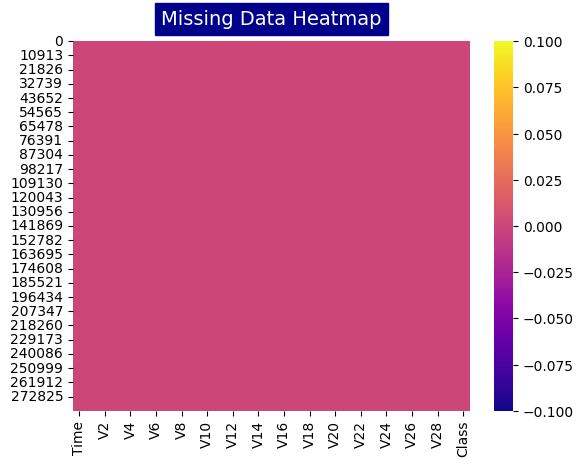

In [28]:
sns.heatmap(df.isnull(), cmap='plasma')
plt.title('Missing Data Heatmap', backgroundcolor='darkblue', color='white',
          fontsize=14, pad=12)
plt.show()

#**Correlation**

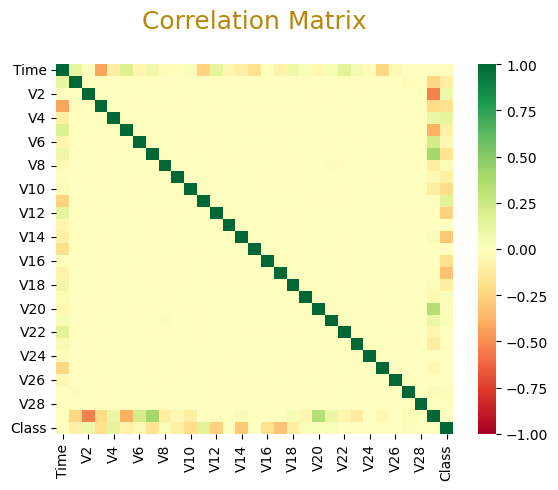

In [32]:
corr=df.corr()

sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1)

title = 'Correlation Matrix\n'
plt.title(title, loc='center', fontsize=18, color='darkgoldenrod')
plt.show()

**Please note that features with strong negative correlations are just as important as those with positive correlations. Our primary interest lies in the correlation of the target variable, which is `Survived`. Let's take a look at the absolute values of the correlation graph for the target variable.**

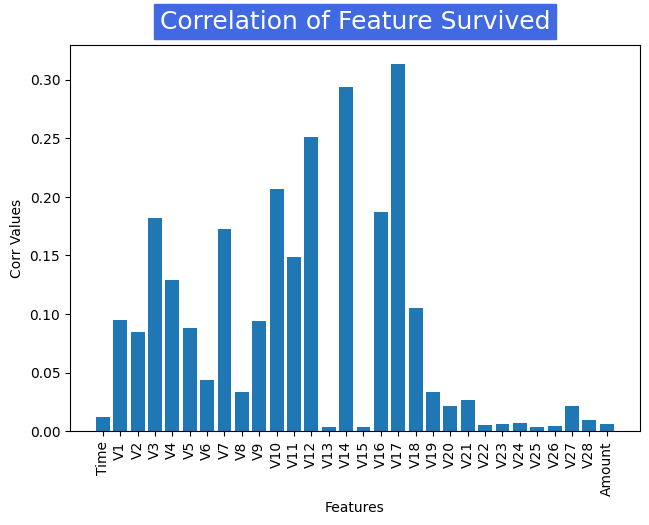

In [33]:
cs = corr['Class'] #correlation of target (Class)
cs.drop('Class',inplace=True)

plt.bar(cs.index,abs(cs.values))
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Features')
plt.ylabel('Corr Values')
plt.title('Correlation of Feature Survived', fontsize=18, backgroundcolor = 'royalblue', color='white', pad=12)
plt.show()

V-14 and V-17 are highly corelated with the target variable (`Class`)among the all features.

#**Data Splitting**

In [36]:
from sklearn.model_selection import train_test_split as tts

In [37]:
X=df.drop('Class',axis=1)
y=df['Class']

X_train, X_test,y_train,y_test=tts(X,y,test_size=0.2, shuffle=True, stratify=y, random_state=68)

#**Data Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
Scaler = StandardScaler()
Scaler.fit(X_train)
Xtrain_std = Scaler.transform(X_train)
Xtest_std = Scaler.transform(X_test)

#**Random Undersampling**

**Since dataset is highly imbalanced, so to tackle this issue let use Random Undersampling technique to match the number of fraudulent transactions**

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
RUS = RandomUnderSampler(random_state=38)
X_resampled, y_resampled = RUS.fit_resample(Xtrain_std, y_train)

#**Models Training**

**Lets Create a list to record the accuracy yield by different models**

In [42]:
Model = []
Train = []
Test  = []

##**Support Vector Classification**

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [44]:
svc=SVC()
svc.fit(X_resampled,y_resampled)
y_pred=svc.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=svc.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    94.31
Test Accuracy    :    98.63

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.09      0.84      0.17        95

    accuracy                           0.99     56746
   macro avg       0.55      0.91      0.58     56746
weighted avg       1.00      0.99      0.99     56746

CONFUSION MATRIX: 

[[55886   765]
 [   15    80]]


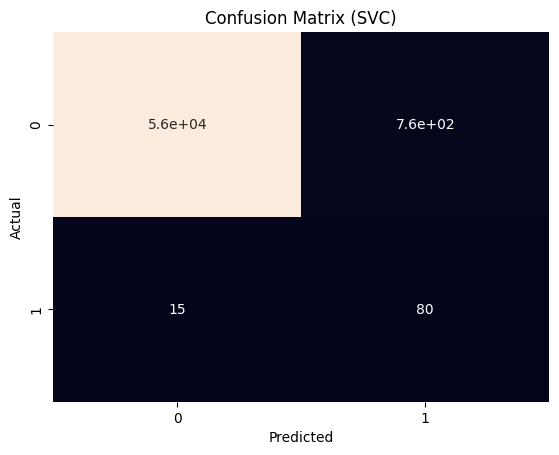

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (SVC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
Model.append('SVC')
Train.append(train_acc)
Test.append(test_acc)

##**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred=lr.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=lr.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    95.24
Test Accuracy    :    96.83

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.89      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.54     56746
weighted avg       1.00      0.97      0.98     56746

CONFUSION MATRIX: 

[[54864  1787]
 [   10    85]]


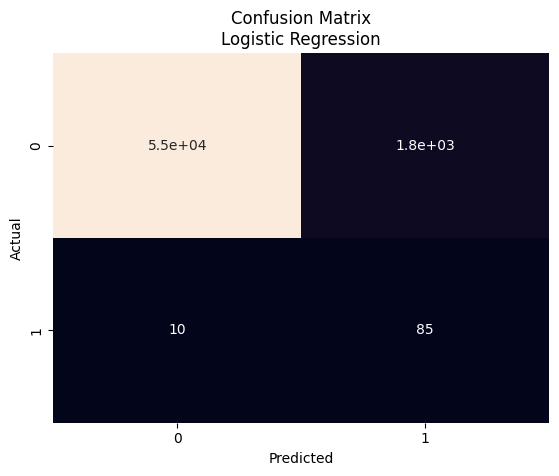

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nLogistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
Model.append('Logistic Reg')
Train.append(train_acc)
Test.append(test_acc)

##**KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

**Let find the optimize k**

In [58]:
neighbors = np.arange(1,50,2,dtype='int')
Accuracy_List = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_resampled,y_resampled)
    y_pred=knn.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_resampled, y_pred=knn.predict(X_resampled))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [k, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [59]:
K_df = pd.DataFrame(Accuracy_List, columns= ["k", "Train Accuracy", "Test Accuracy"])
K_df.head(5)

,k,Train Accuracy,Test Accuracy
0,1,100.00,94.63
1,3,95.11,96.89
2,5,95.37,97.79
3,7,94.18,98.43
4,9,94.05,98.63


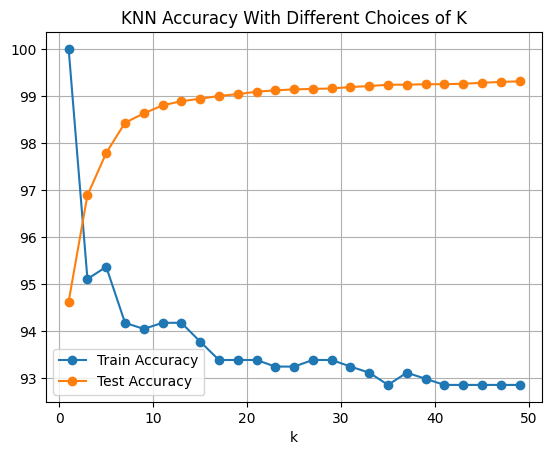

In [60]:
#Lets analyze the best K
K_df.plot(kind='line',marker='o',x='k')
plt.title('KNN Accuracy With Different Choices of K')
plt.grid('on')
plt.show()

In [61]:
K_df

,k,Train Accuracy,Test Accuracy
0,1,100.00,94.63
1,3,95.11,96.89
2,5,95.37,97.79
3,7,94.18,98.43
4,9,94.05,98.63
5,11,94.18,98.80
6,13,94.18,98.89
7,15,93.78,98.94
8,17,93.39,99.00
9,19,93.39,99.04


In [62]:
K=13

In [63]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_resampled,y_resampled)
y_pred=knn.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=knn.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    94.18
Test Accuracy    :    98.89

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.84      0.20        95

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746

CONFUSION MATRIX: 

[[56037   614]
 [   15    80]]


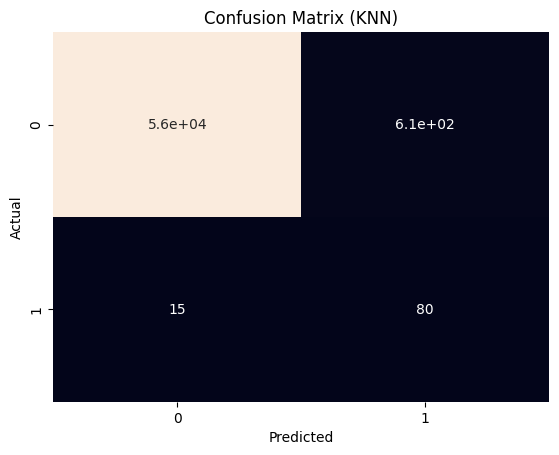

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
Model.append('KNN')
Train.append(train_acc)
Test.append(test_acc)

##**Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'max_depth': [1, 3, 5, 7, 9, 10, 12, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [  1, 2, 4, 8, 10]}

# Create the DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=32)

# Create the GridSearchCV object
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

# Fit the model with the data
grid_search.fit(X_resampled, y_resampled)  # Replace X_train and y_train with your training data

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [68]:
best_dt_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=20, random_state=32)

In [69]:
DT = best_dt_classifier
DT.fit(X_resampled,y_resampled)
y_pred=DT.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=DT.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    92.46
Test Accuracy    :    97.71

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.81      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.55     56746
weighted avg       1.00      0.98      0.99     56746

CONFUSION MATRIX: 

[[55367  1284]
 [   18    77]]


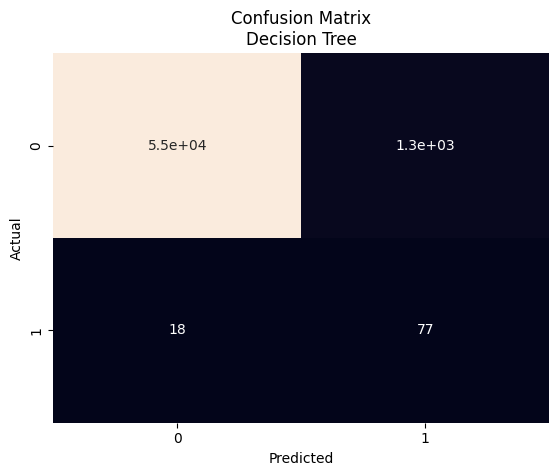

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nDecision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
Model.append('Dec. Tree')
Train.append(train_acc)
Test.append(test_acc)

##**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
estimator = np.arange(1,30,dtype='int')
Accuracy_List = []
for n in estimator:
    RF = RandomForestClassifier(n_estimators=n)
    RF.fit(X_resampled,y_resampled)
    y_pred=RF.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_resampled, y_pred=RF.predict(X_resampled))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [74]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,95.37,89.52
1,2,96.03,96.55
2,3,98.81,93.34
3,4,97.75,97.73
4,5,98.81,95.21


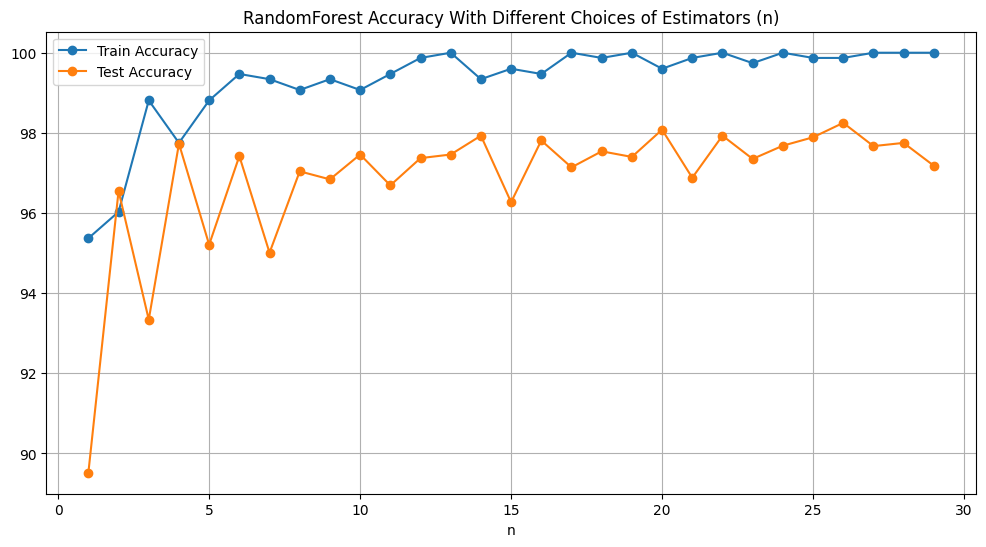

In [75]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('RandomForest Accuracy With Different Choices of Estimators (n)')
plt.grid()
plt.show()

In [76]:
n=26

In [77]:
RF = RandomForestClassifier(n_estimators=n)
RF.fit(X_resampled,y_resampled)
y_pred=RF.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=RF.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    100.00
Test Accuracy    :    97.77

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.86      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

CONFUSION MATRIX: 

[[55401  1250]
 [   13    82]]


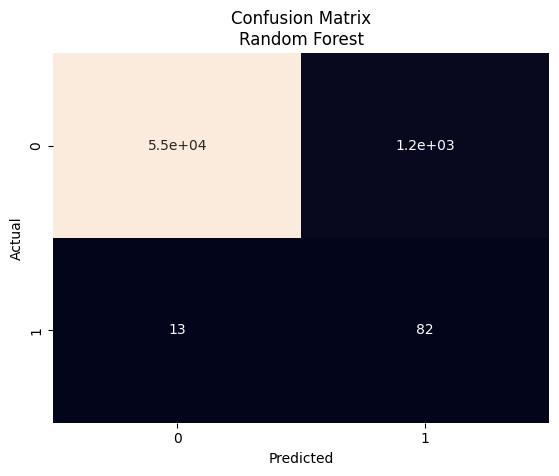

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nRandom Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
Model.append('Rand. Forest')
Train.append(train_acc)
Test.append(test_acc)

##**Gradient Boosting**

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
estimator = np.arange(1,30,dtype='int')
Accuracy_List = []
for n in estimator:
    GBC = GradientBoostingClassifier(n_estimators=n)
    GBC.fit(X_resampled,y_resampled)
    y_pred=GBC.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_resampled, y_pred=GBC.predict(X_resampled))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [82]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,95.5,96.59
1,2,95.5,96.59
2,3,95.5,96.59
3,4,95.5,96.42
4,5,95.5,96.46


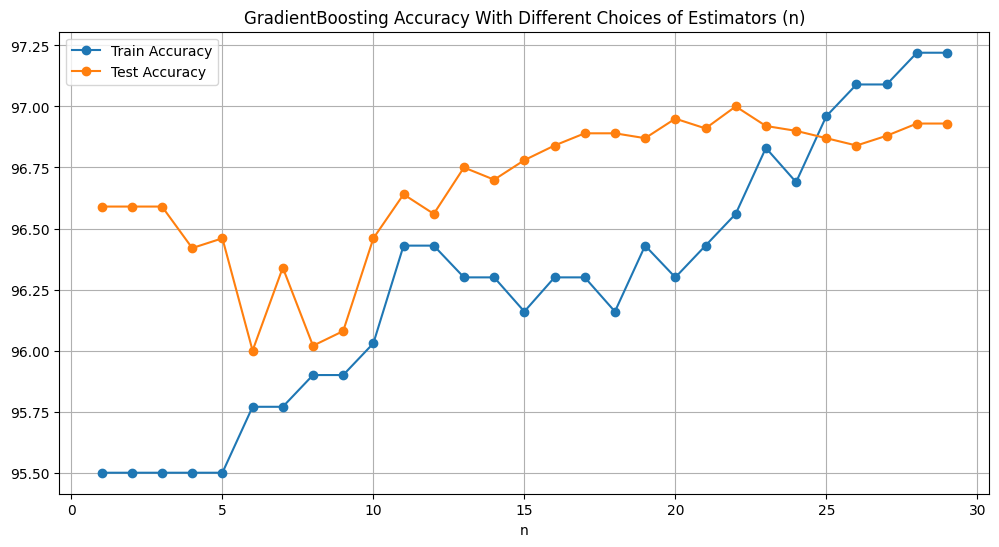

In [83]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('GradientBoosting Accuracy With Different Choices of Estimators (n)')
plt.grid('on')
plt.show()

In [84]:
n=22

In [85]:
GBC = GradientBoostingClassifier(n_estimators=n)
GBC.fit(X_resampled,y_resampled)
y_pred=GBC.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_resampled, y_pred=GBC.predict(X_resampled))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    96.56
Test Accuracy    :    96.97

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.86      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746

CONFUSION MATRIX: 

[[54942  1709]
 [   13    82]]


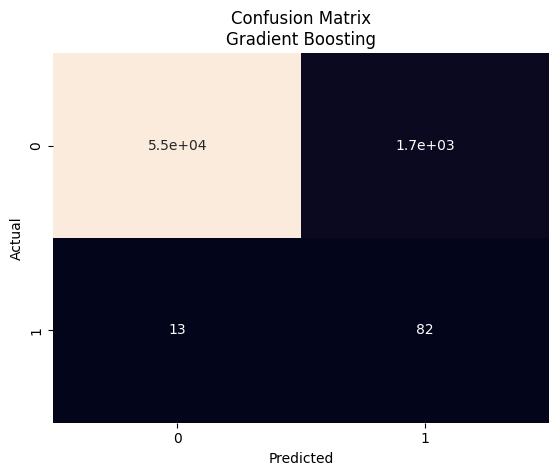

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nGradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
Model.append('Grad. Boosting')
Train.append(train_acc)
Test.append(test_acc)

In [88]:
data = {'Train': Train, 'Test':Test}
acc_df = pd.DataFrame(data=data, index=Model)
acc_df.index.name = 'Model / Accuracy'
acc_df

,Train,Test
Model / Accuracy,,
SVC,94.312169,98.625454
Logistic Reg,95.238095,96.833257
KNN,94.179894,98.891552
Dec. Tree,92.460317,97.705565
Rand. Forest,100.000000,97.774292
Grad. Boosting,96.560847,96.965425


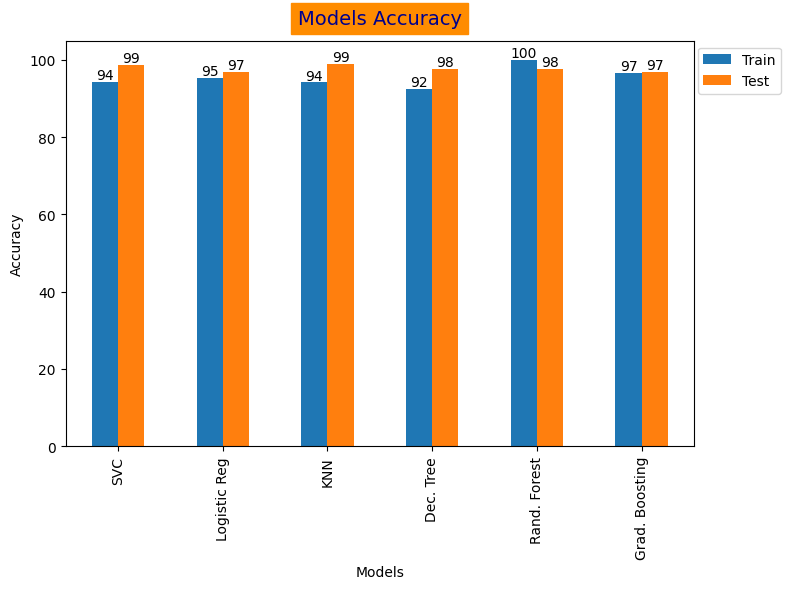

In [89]:
fig, axis = plt.subplots(figsize=(8,6))
ax = acc_df.plot(kind='bar', ax=axis)
# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Models Accuracy', color='darkblue', backgroundcolor='darkorange', pad=12, fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

**Hence the model `SVC` perform better than the all others classifiers**